<center>
<h1 style="color:red; font-size:70px;"> Multi-layer perceptron</h1>

Il Multilayer Perceptron (MLP) è un tipo di rete neurale costituita da più layer di nodi interconnessi, che tipicamente sono di tre tipologie: input, hidden (uno o più) e output. I layer nascosti permettono al modello di apprendere relazioni non lineari tra le feature, cosa che un semplice perceptron non può fare.

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from sklearn.datasets import load_digits
from keras.layers import Input, Dense, Flatten

## Dataset

In primo luogo esploro un po' il dataset, in modo tale da comprendere quali saranno le immagini su cui allenare e testare la rete neurale.

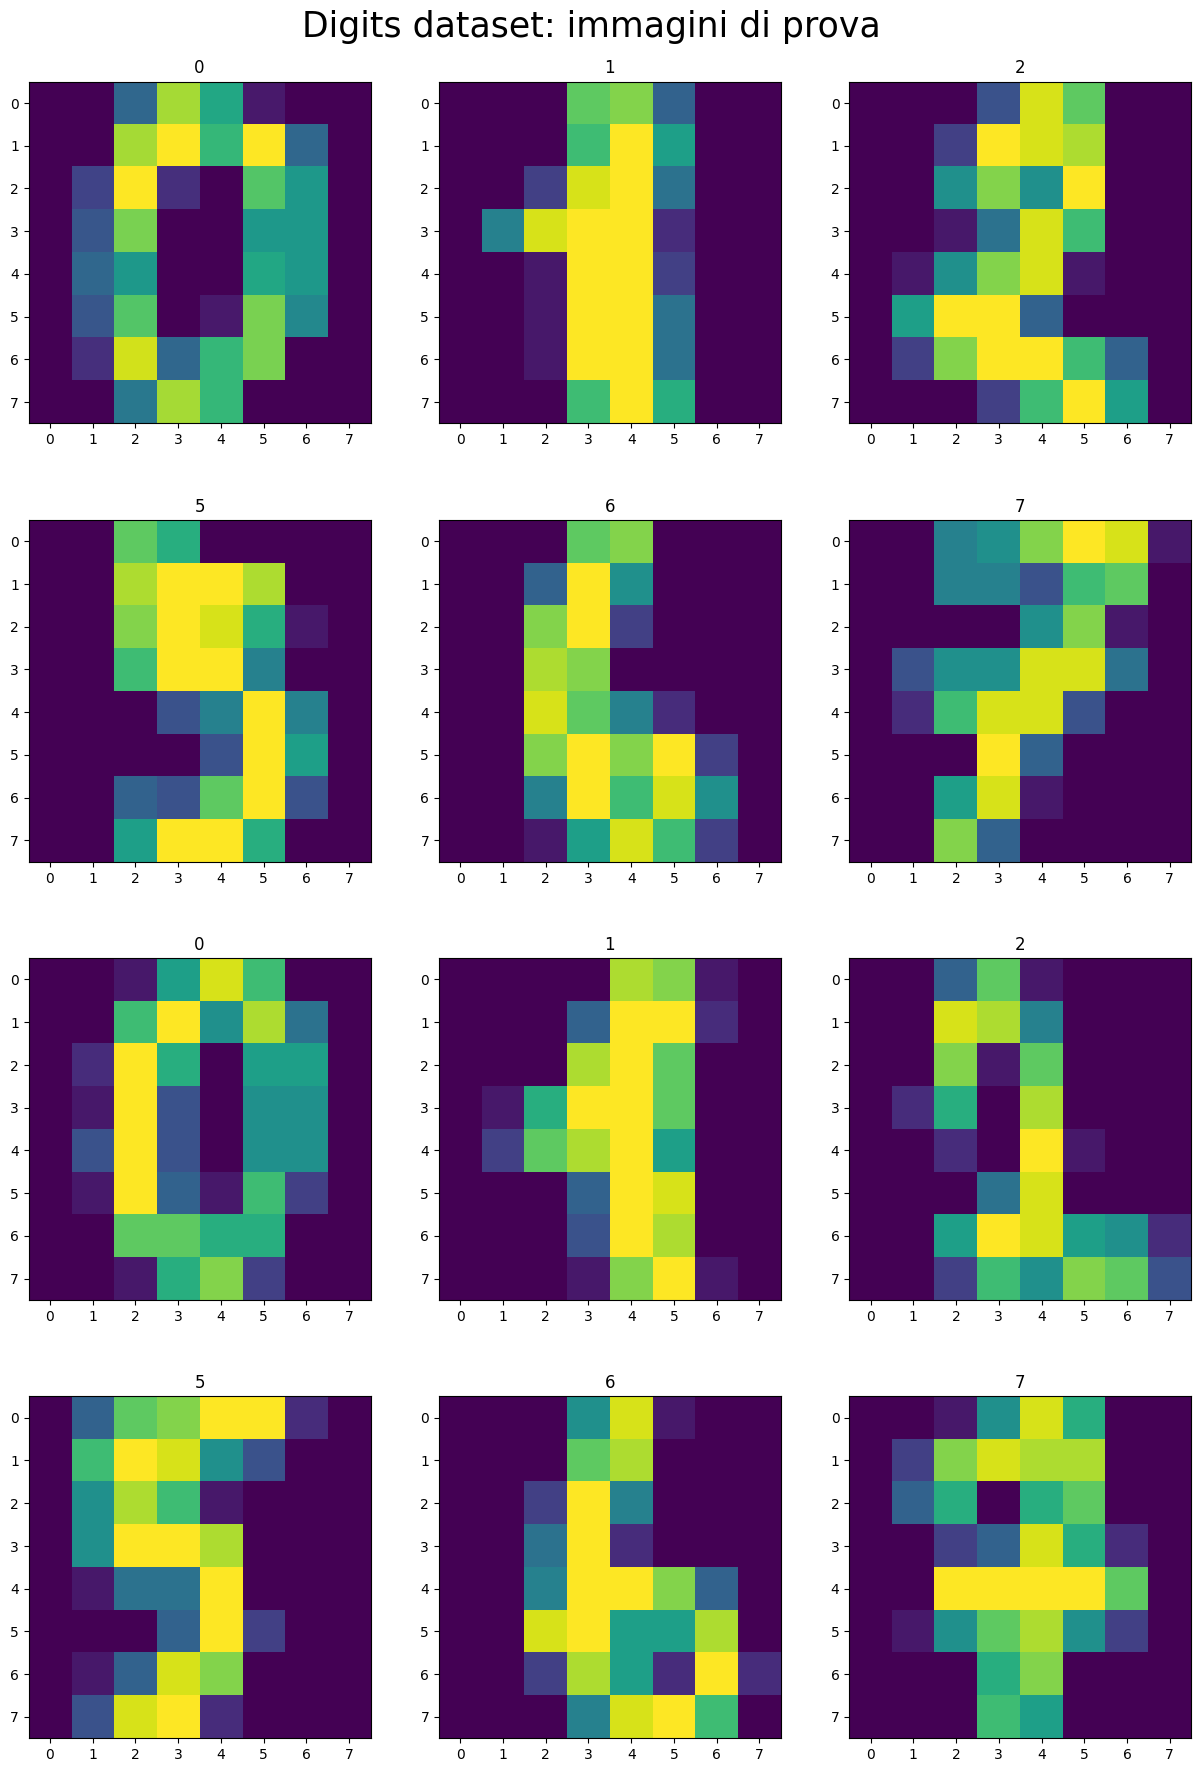

In [12]:
# Funzione per visualizzare alcuni elementi appartenenti al dataset
def studyDat(img, lab):
    fig, ax = plt.subplots(4, 3, figsize = (15, 20))
    for i in range(0, 4):
        for j in range(0, 3):
            ax[i][j].imshow(img[5*i+j])
            ax[i][j].set_title(str(lab[5*i+j]))

    fig.suptitle("Digits dataset: immagini di prova", fontsize = 25)
    plt.subplots_adjust(top=0.95)
    plt.show()


digits = load_digits()

img = digits.images
lab = digits.target
studyDat(img, lab)

## Costruzione del modello

Come riportato in precedenza, il MLP è un modello sequenziale che presenta almeno tre strati. In questo caso, dato che il problema in studio è semplice, non vogliamo complicare eccessivamente la casistica ed è per questo che i layer nascosti sono solamente due, dei quali il primo presenta 128 nodi, mentre il secondo 32. Un modello esageratamente arzigogolato comporterebbe un rischio elevato di overfitting, che noi vogliamo chiaramente evitare.

In [18]:
# Creazione del modello. Dato che il problema che stiamo prendendo in considerazione è un 
# problema di classificazione, è necessario che i nodi di output siano tanti quanti sono le 
# classi del dataset in analisi. Per tali componenti della rete vogliamo utilizzare come funzione 
# d'attivazione 'softmax', in modo tale che sia possibile identificare quale sia la predizione più 
# probabile del modello.

# Funzione per creare il modello
def buildMod():
    model = tf.keras.models.Sequential([
        Flatten(input_shape=(8, 8)),
        Dense(128, activation='relu'),
        Dense(32, activation='relu'),
        Dense(10, activation='softmax')
    ])

    return model

model = buildMod()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Allenamento della rete

Il numero di epoche che stiamo prendendo in considerazione è chiaramente troppo elevato, dato che notiamo una risalita della validation loss. Questo è un chiaro esempio di overfiitting, in cui il modello diventa troppo abituato ai dati di training da consentire una generalizzazione adeguata.

In [19]:
lab_onehot = tf.keras.utils.to_categorical(lab, num_classes=10)
hist = model.fit(img, lab_onehot, epochs=100, validation_split=0.2, batch_size=32)

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - accuracy: 0.3955 - loss: 2.6326 - val_accuracy: 0.7361 - val_loss: 0.8521
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8744 - loss: 0.4161 - val_accuracy: 0.8222 - val_loss: 0.6076
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.9360 - loss: 0.2208 - val_accuracy: 0.8472 - val_loss: 0.4996
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.9680 - loss: 0.1168 - val_accuracy: 0.8694 - val_loss: 0.4276
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9730 - loss: 0.0937 - val_accuracy: 0.8889 - val_loss: 0.3803
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9849 - loss: 0.0568 - val_accuracy: 0.9000 - val_loss: 0.3863
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.9924 - loss: 0.0448 - val_accuracy: 0.8917 - val_loss: 0.3498
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.9955 - loss: 0.0293 - val_accuracy: 0.

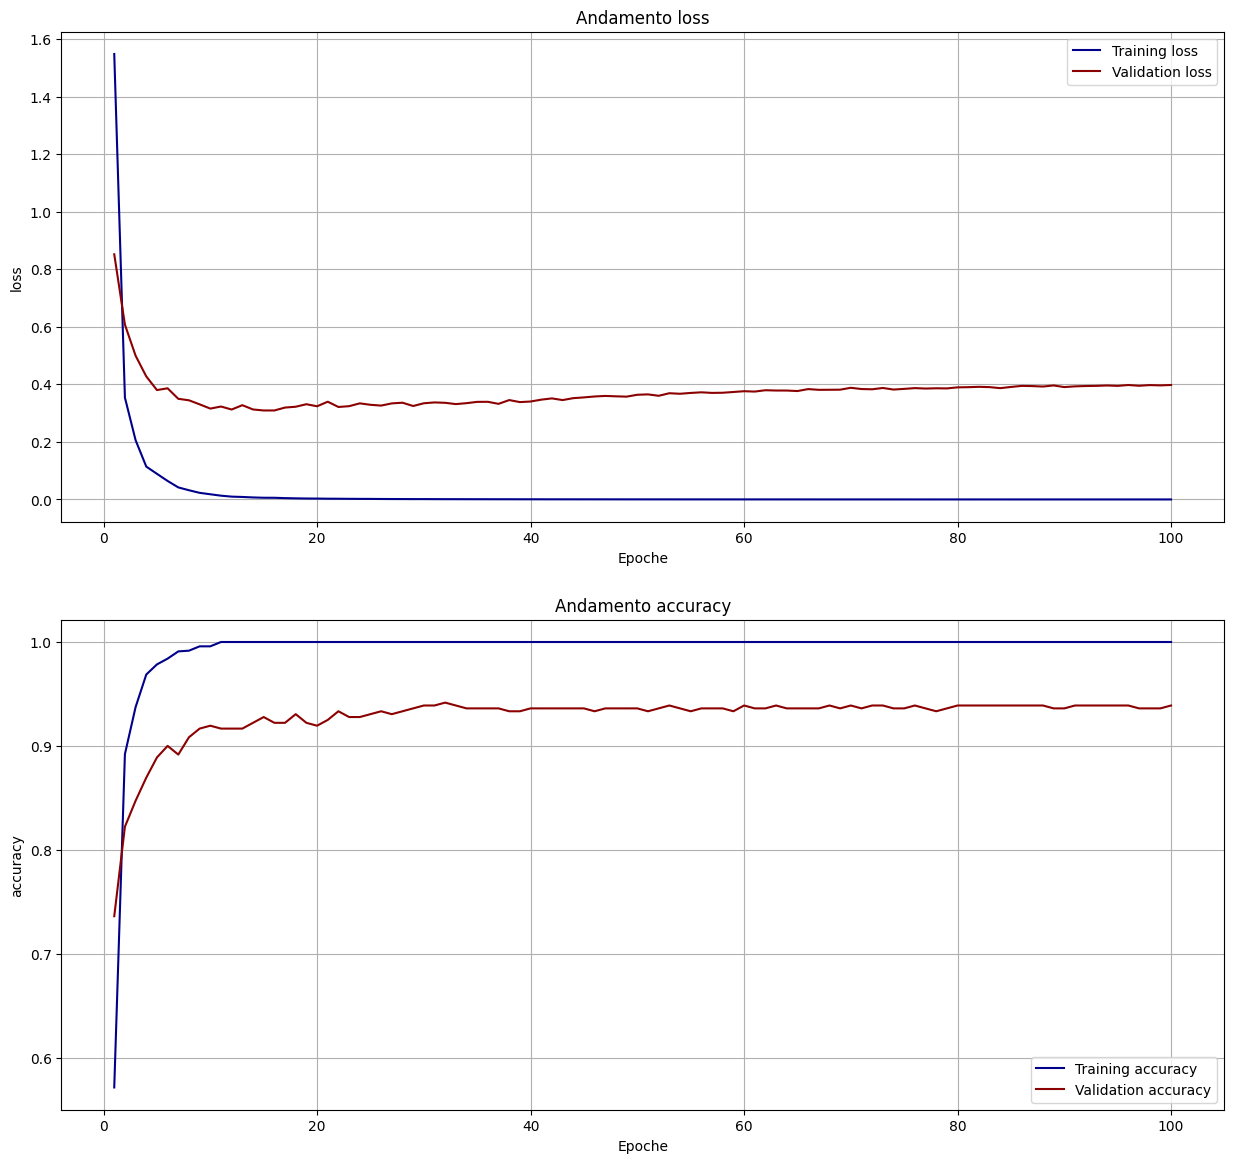

In [20]:
def plotTrInfo(hist):
    # Funzione per graficare l'evoluzione di loss ed accuracy in fase di allenamento
    fig, ax = plt.subplots(2, 1, figsize=(15,14))

    dim = len(hist.history['loss'])
    lab = ['loss', 'accuracy']

    for i, l in enumerate(lab):
        ax[i].plot(np.linspace(1, dim, dim), hist.history[l], color = 'darkblue', label = "Training " + l)
        ax[i].plot(np.linspace(1, dim, dim), hist.history['val_'+l], color = 'darkred', label = "Validation " + l)
        ax[i].set_title("Andamento " + l)
        ax[i].set_xlabel("Epoche")
        ax[i].set_ylabel(l)

        ax[i].legend(loc="best")
        ax[i].grid(True)
    plt.show()

plotTrInfo(hist)

## Predizioni

Anche se la rete è in overtraining, proviamo ad effettuare alcune predizioni. Chiaramente se non fosse un semplice esercizio, prima di questa fase sarebbe necessario prendere delle precauzioni come per esempio l'***early stopping***.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


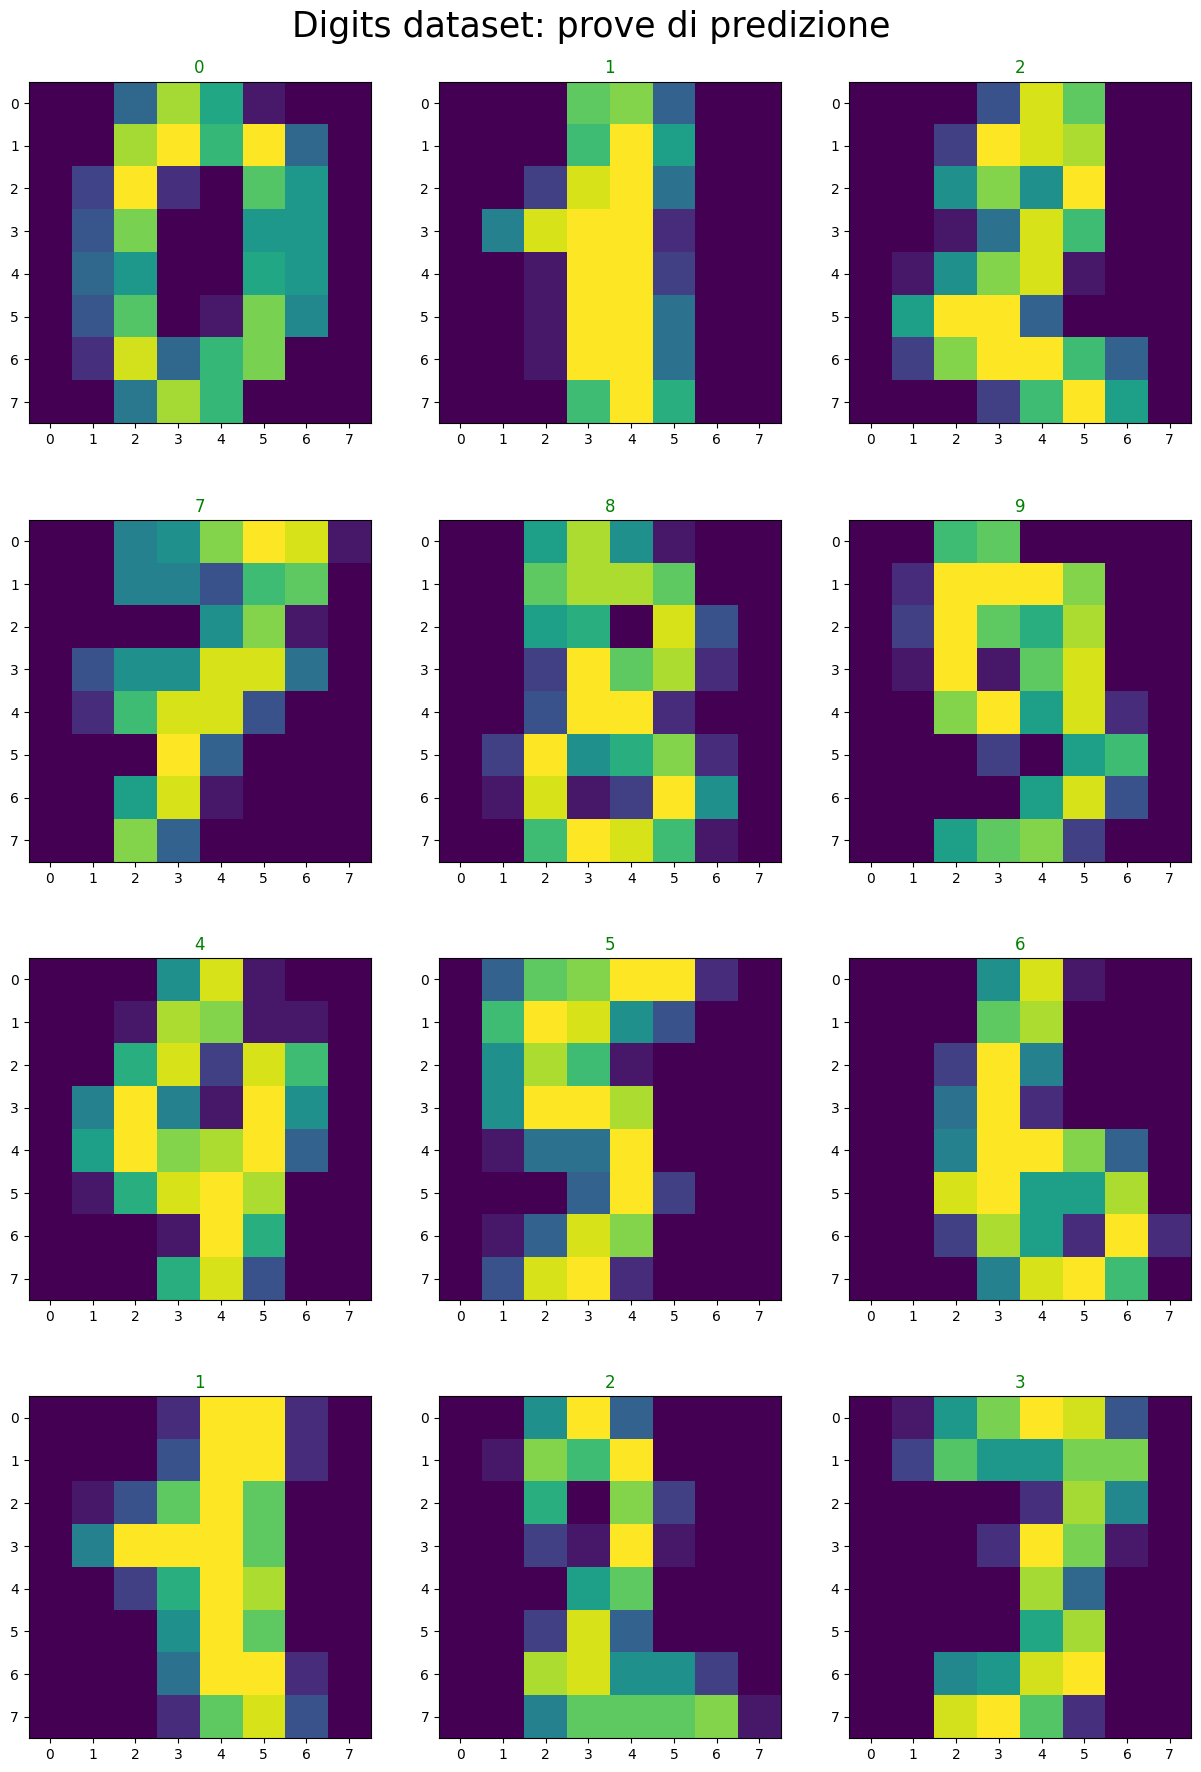

In [22]:
# Funzione per visualizzare alcune predizioni
def tryPred(model, img, lab):
    fig1, ax1 = plt.subplots(4, 3, figsize = (15, 20))
    for i in range(0, 4):
        for j in range(0, 3):
            ax1[i][j].imshow(img[7*i+j])
            pred = np.argmax(model.predict(np.expand_dims(img[7*i+j], axis=0)))

            color = 'green'
            if pred != lab[7*i+j]:
                color = 'red'
            ax1[i][j].set_title(str(pred), color = color)

    fig1.suptitle("Digits dataset: prove di predizione", fontsize = 25)
    plt.subplots_adjust(top=0.95)
    plt.show()

tryPred(model, img, lab)